## Music recommendation system using Nearest Neighbors

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('datasets/alternative_music_data.csv')
df2 = pd.read_csv('datasets/blues_music_data.csv')
df3 = pd.read_csv('datasets/hiphop_music_data.csv')
df4 = pd.read_csv('datasets/indie_alt_music_data.csv')
df5 = pd.read_csv('datasets/metal_music_data.csv')
df6 = pd.read_csv('datasets/pop_music_data.csv')
df7 = pd.read_csv('datasets/rock_music_data.csv')

### Combine into a single dataset

In [4]:
df = df1.append([df2,df3,df4,df5,df6,df7])

In [5]:
df.head()

,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,James,Laid,66,"['britpop', 'madchester', 'new wave', 'new wav...",Alternative 90s,0.457,0.909,0,-9.451,1,...,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4
1,grandson,In Over My Head,60,"['modern alternative rock', 'modern rock', 'ro...",Alternative Beats,0.582,0.817,0,-6.475,1,...,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4
2,Foals,On The Luna,51,"['alternative dance', 'indie rock', 'modern al...",Alternative 10s,0.525,0.976,0,-2.023,1,...,0.000392,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4
3,Longpigs,She Said,47,"['britpop', 'sheffield indie']",Alternative 90s,0.210,0.870,5,-5.985,1,...,0.000488,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4
4,Beastie Boys,Sure Shot,57,"['alternative rock', 'east coast hip hop', 'go...",Alternative 90s,0.692,0.799,1,-7.924,1,...,0.000000,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26752 entries, 0 to 8746
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       26752 non-null  object 
 1   Track Name        26752 non-null  object 
 2   Popularity        26752 non-null  int64  
 3   Genres            26752 non-null  object 
 4   Playlist          26752 non-null  object 
 5   danceability      26752 non-null  float64
 6   energy            26752 non-null  float64
 7   key               26752 non-null  int64  
 8   loudness          26752 non-null  float64
 9   mode              26752 non-null  int64  
 10  speechiness       26752 non-null  float64
 11  acousticness      26752 non-null  float64
 12  instrumentalness  26752 non-null  float64
 13  liveness          26752 non-null  float64
 14  valence           26752 non-null  float64
 15  tempo             26752 non-null  float64
 16  id                26752 non-null  object 

In [7]:
total_len = len(df1) + len(df2) + len(df3) + len(df4) + len(df5) + len(df6) + len(df7)

In [8]:
total_len

26752

In [9]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,2.675200e+04,26752.000000
mean,46.603544,0.551091,0.698948,5.299604,-7.231568,0.623131,0.085210,0.186927,0.110631,0.198308,0.493760,123.791402,2.316677e+05,3.936379
std,18.890180,0.166505,0.210743,3.566726,3.312386,0.484611,0.087807,0.265412,0.246161,0.156232,0.233485,29.365056,7.955645e+04,0.334642
min,0.000000,0.000000,0.000020,0.000000,-34.825000,0.000000,0.000000,0.000000,0.000000,0.011900,0.000000,0.000000,1.379300e+04,0.000000
25%,34.000000,0.439000,0.558000,2.000000,-8.802000,0.000000,0.035800,0.002370,0.000000,0.097300,0.313000,100.017000,1.862860e+05,4.000000
50%,46.000000,0.550000,0.730000,5.000000,-6.599000,1.000000,0.050600,0.044450,0.000262,0.134000,0.490000,122.005000,2.176090e+05,4.000000
75%,60.000000,0.667000,0.877000,9.000000,-4.955000,1.000000,0.091300,0.285000,0.033400,0.267000,0.673000,143.373000,2.582270e+05,4.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.960000,0.996000,0.996000,0.992000,0.986000,249.438000,1.561133e+06,5.000000


### Filter and keep only unique songs

In [10]:
df['unique_songs'] = df['Track Name'] + ' ' + df['Artist Name']

In [12]:
len(df['unique_songs'].unique())

18554

In [13]:
df = df.drop_duplicates(subset = "unique_songs")

In [14]:
len(df)

18554

In [35]:
df.head()

,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,unique_songs
0,James,Laid,66,"['britpop', 'madchester', 'new wave', 'new wav...",Alternative 90s,0.457,0.909,0,-9.451,1,...,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4,Laid James
1,grandson,In Over My Head,60,"['modern alternative rock', 'modern rock', 'ro...",Alternative Beats,0.582,0.817,0,-6.475,1,...,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4,In Over My Head grandson
2,Foals,On The Luna,51,"['alternative dance', 'indie rock', 'modern al...",Alternative 10s,0.525,0.976,0,-2.023,1,...,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4,On The Luna Foals
3,Longpigs,She Said,47,"['britpop', 'sheffield indie']",Alternative 90s,0.210,0.870,5,-5.985,1,...,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4,She Said Longpigs
4,Beastie Boys,Sure Shot,57,"['alternative rock', 'east coast hip hop', 'go...",Alternative 90s,0.692,0.799,1,-7.924,1,...,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4,Sure Shot Beastie Boys


In [15]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,18554.000000,18554.000000,18554.000000,18554.000000,18554.000000,18554.000000,18554.000000,18554.000000,18554.000000,18554.000000,18554.000000,18554.000000,1.855400e+04,18554.000000
mean,43.289749,0.550664,0.685335,5.298696,-7.484237,0.616094,0.086660,0.209960,0.120406,0.199013,0.486306,123.240500,2.360681e+05,3.929234
std,17.690093,0.169173,0.219051,3.572298,3.502007,0.486349,0.090623,0.279604,0.258036,0.159602,0.237177,29.606419,8.479569e+04,0.353779
min,0.000000,0.000000,0.000020,0.000000,-34.825000,0.000000,0.000000,0.000000,0.000000,0.011900,0.000000,0.000000,1.379300e+04,0.000000
25%,32.000000,0.436000,0.537000,2.000000,-9.113000,0.000000,0.035600,0.003100,0.000001,0.097600,0.301000,99.952250,1.886000e+05,4.000000
50%,43.000000,0.551000,0.716000,5.000000,-6.817000,1.000000,0.050300,0.061200,0.000313,0.132000,0.481000,120.993500,2.205740e+05,4.000000
75%,55.000000,0.670000,0.872000,9.000000,-5.082250,1.000000,0.092475,0.339000,0.042575,0.265000,0.669000,142.177000,2.624905e+05,4.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.960000,0.996000,0.996000,0.992000,0.986000,249.438000,1.561133e+06,5.000000


In [17]:
features = df.describe().columns

In [19]:
df_cleaned = df[features].copy()

### Analysis on the dataset

In [20]:
df_cleaned.corr()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Popularity,1.000000,0.132513,0.021677,-0.004728,0.112898,0.017165,0.033313,-0.084926,-0.178058,-0.063094,0.048331,-0.015046,-0.063273,0.051997
danceability,0.132513,1.000000,-0.193858,0.010960,-0.032638,-0.062577,0.205668,0.089161,-0.204042,-0.121727,0.447822,-0.208472,-0.256813,0.134895
energy,0.021677,-0.193858,1.000000,0.017868,0.730107,-0.014122,0.092031,-0.700193,-0.005295,0.187063,0.140430,0.182729,0.012026,0.128287
key,-0.004728,0.010960,0.017868,1.000000,-0.005034,-0.150879,0.014626,-0.003517,0.019822,-0.001241,0.021301,0.003715,0.009707,0.008026
loudness,0.112898,-0.032638,0.730107,-0.005034,1.000000,-0.029048,0.064302,-0.538651,-0.217532,0.091735,0.100320,0.130949,-0.119737,0.109259
mode,0.017165,-0.062577,-0.014122,-0.150879,-0.029048,1.000000,-0.057342,0.005796,0.003279,0.004105,0.000811,0.021988,-0.011519,-0.011612
speechiness,0.033313,0.205668,0.092031,0.014626,0.064302,-0.057342,1.000000,-0.063727,-0.101154,0.075156,0.046338,0.043796,-0.137000,0.058654
acousticness,-0.084926,0.089161,-0.700193,-0.003517,-0.538651,0.005796,-0.063727,1.000000,0.008665,-0.101447,-0.057286,-0.144261,-0.057369,-0.111524
instrumentalness,-0.178058,-0.204042,-0.005295,0.019822,-0.217532,0.003279,-0.101154,0.008665,1.000000,-0.007888,-0.181839,0.014341,0.189901,-0.044933
liveness,-0.063094,-0.121727,0.187063,-0.001241,0.091735,0.004105,0.075156,-0.101447,-0.007888,1.000000,0.004310,0.019334,0.054239,0.007636


In [21]:
df_cleaned.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,66,0.457,0.909,0,-9.451,1,0.0317,0.001600,0.000276,0.1350,0.755,115.998,156667,4
1,60,0.582,0.817,0,-6.475,1,0.0399,0.001700,0.015800,0.5750,0.622,155.124,198366,4
2,51,0.525,0.976,0,-2.023,1,0.0479,0.066200,0.000392,0.0804,0.855,138.984,192695,4
3,47,0.210,0.870,5,-5.985,1,0.0606,0.000147,0.000488,0.1880,0.517,168.352,264067,4
4,57,0.692,0.799,1,-7.924,1,0.1640,0.388000,0.000000,0.3010,0.549,97.978,199667,4


<AxesSubplot:>

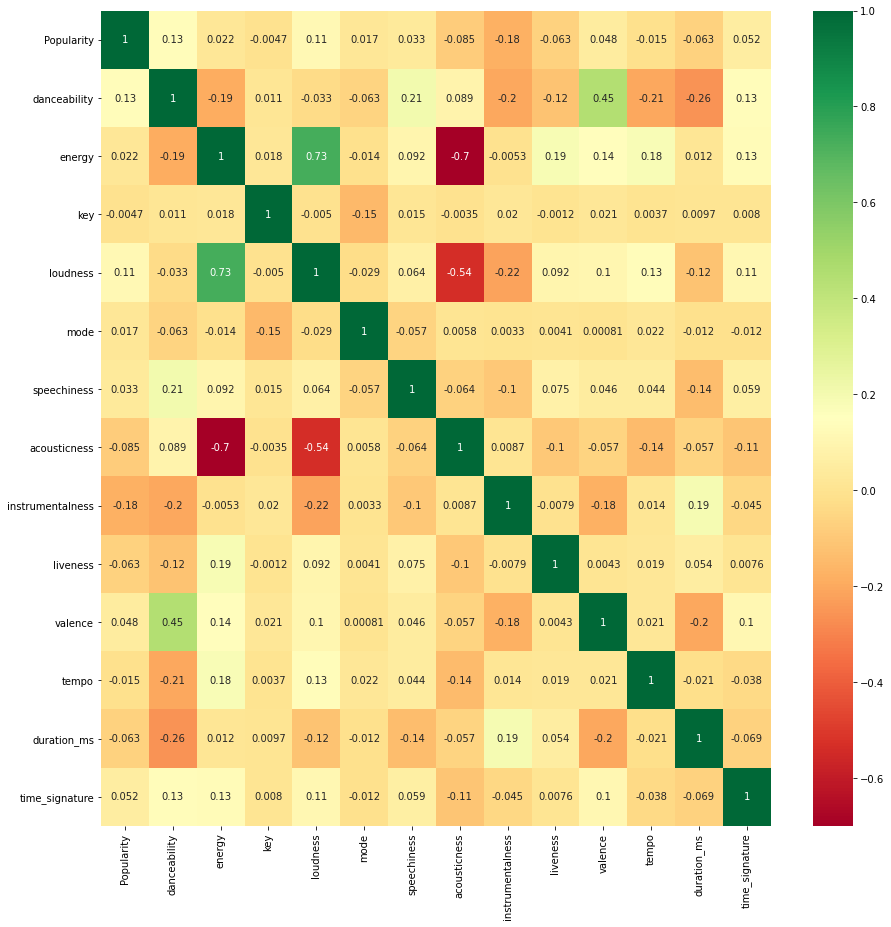

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df_cleaned.corr(),annot=True,cmap="RdYlGn")

In [23]:
def plot_distplot(feature):
    sns.distplot(df_cleaned[feature].dropna(),kde=False,color='darkred',bins=10)
    plt.show()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


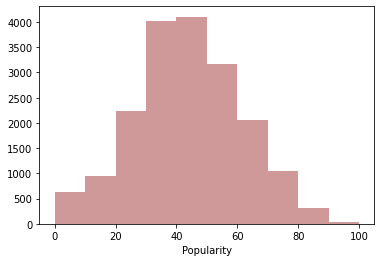

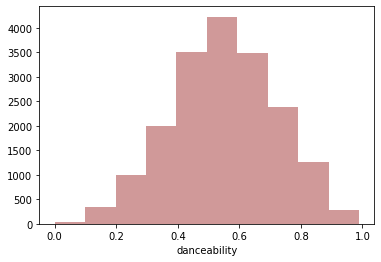

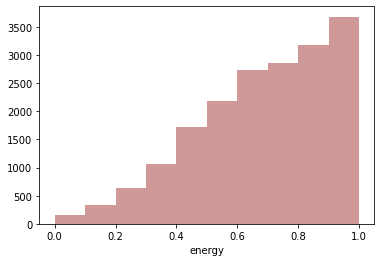

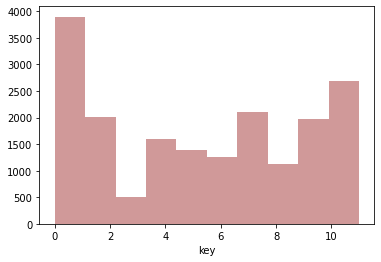

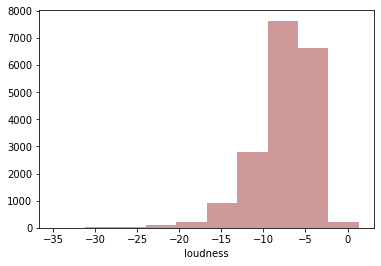

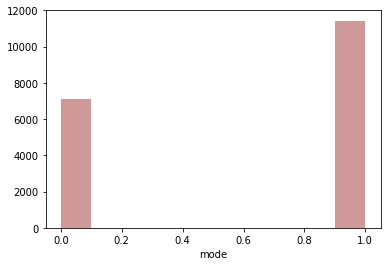

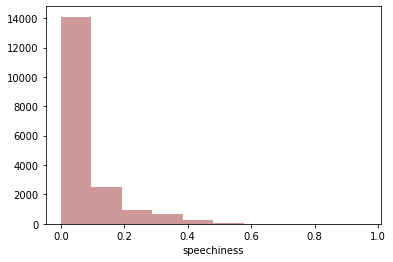

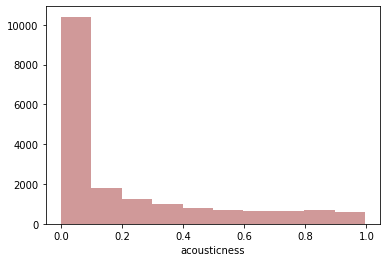

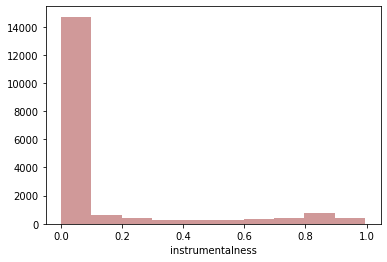

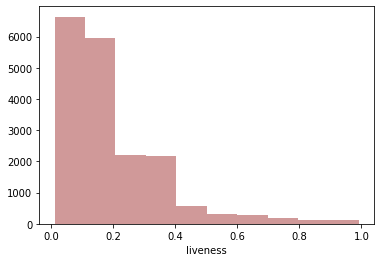

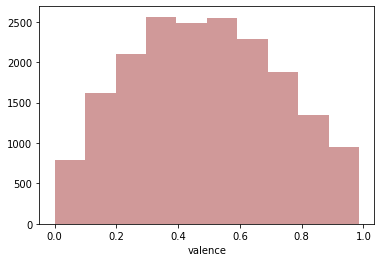

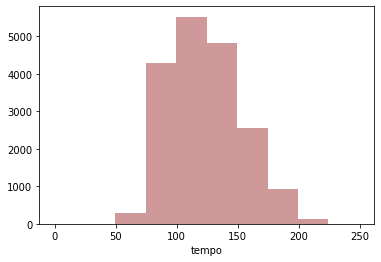

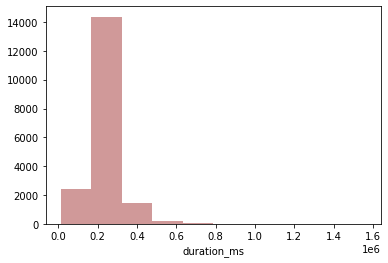

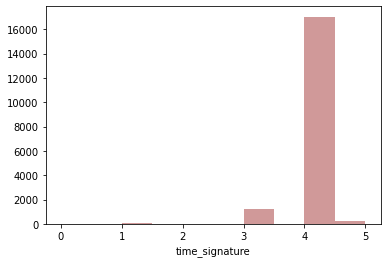

In [24]:
for i in range(len(features)):
    plot_distplot(features[i])

### Selecting the relevant features

Popularity will be used after getting some recommendations using model

In [25]:
df_cleaned = df_cleaned.drop(['Popularity','duration_ms','time_signature','mode'],axis=1)

In [26]:
df_cleaned.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.457,0.909,0,-9.451,0.0317,0.001600,0.000276,0.1350,0.755,115.998
1,0.582,0.817,0,-6.475,0.0399,0.001700,0.015800,0.5750,0.622,155.124
2,0.525,0.976,0,-2.023,0.0479,0.066200,0.000392,0.0804,0.855,138.984
3,0.210,0.870,5,-5.985,0.0606,0.000147,0.000488,0.1880,0.517,168.352
4,0.692,0.799,1,-7.924,0.1640,0.388000,0.000000,0.3010,0.549,97.978


In [27]:
len(df_cleaned)

18554

### Scaling the features to same level

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
scaled_model = scaler.fit(df_cleaned)

In [62]:
scaled_features = scaler.transform(df_cleaned)

In [63]:
df_cleaned = pd.DataFrame(scaled_features,columns=df_cleaned.columns)

In [64]:
df_cleaned.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.462083,0.908998,0.000000,0.701327,0.033021,0.001606,0.000277,0.125599,0.765720,0.465037
1,0.588473,0.816996,0.000000,0.783582,0.041563,0.001707,0.015863,0.574533,0.630832,0.621894
2,0.530839,0.976000,0.000000,0.906633,0.049896,0.066466,0.000394,0.069891,0.867140,0.557189
3,0.212336,0.869997,0.454545,0.797125,0.063125,0.000148,0.000490,0.179676,0.524341,0.674925
4,0.699697,0.798996,0.090909,0.743532,0.170833,0.389558,0.000000,0.294970,0.556795,0.392795


In [65]:
import pickle

In [67]:
filename = 'scaler.pkl'
pickle.dump(scaler,open(filename,'wb'))

### Building the model

In [68]:
from sklearn.neighbors import NearestNeighbors

In [69]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df_cleaned)

NearestNeighbors(algorithm='brute', metric='cosine')

### Making some recommendation

In [70]:
query_index = np.random.choice(df.shape[0])
print(query_index)

1832


In [71]:
df.iloc[query_index,:2]

Artist Name    Lorenzo_BITW
Track Name           Pantea
Name: 1975, dtype: object

In [72]:
distances, indices = model_knn.kneighbors(df_cleaned.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 11)

In [73]:
music_list = []
for i in range(0, len(distances.flatten())):
    if i == 0:
        pass
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df.iloc[indices.flatten()[i],22], distances.flatten()[i]))
        temp = [df.iloc[indices.flatten()[i],0],df.iloc[indices.flatten()[i],1],distances.flatten()[i],df.iloc[indices.flatten()[i],2]]
        music_list.append(temp)

1: 50//50 Vantage, with distance of 0.002241041417581302:
2: Dragonfly Enamour, with distance of 0.006056166264282958:
3: Monolith Qrion, with distance of 0.006292184002661405:
4: Next Hype - Instrumental Tempa T, with distance of 0.006892279073902219:
5: Cavern Liquid Liquid, with distance of 0.007123578050407087:
6: Hope Booka Shade, with distance of 0.007839570647413585:
7: Absinthe & A Cracker TU, with distance of 0.007950495120589762:
8: HNDI Sasha, with distance of 0.008187664199371891:
9: The Yancey Glenn Astro, with distance of 0.01096539451245715:
10: Press Enter To Exit The Horrors, with distance of 0.010981680860880028:


### Recommending based on popularity and all features

In [74]:
music_list.sort(key= lambda X:X[3])

In [76]:
for i in range(len(music_list)):
    print('{0}: {1} by {2}'.format(i+1,music_list[i][1],music_list[i][0]))

1: Next Hype - Instrumental by Tempa T
2: Absinthe & A Cracker by TU
3: HNDI by Sasha
4: The Yancey by Glenn Astro
5: Dragonfly by Enamour
6: Monolith by Qrion
7: Cavern by Liquid Liquid
8: Hope by Booka Shade
9: Press Enter To Exit by The Horrors
10: 50//50 by Vantage


In [77]:
filename1 = 'nn_recommender.pkl'

In [78]:
pickle.dump(model_knn,open(filename1,'wb'))

In [79]:
df.to_csv('dataset.csv',index=False)